Análise de Voltametria de pulso diferencial para dados relacionados a concentração de troponina

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
import scipy.stats as stats
from findpeaks import findpeaks
from electrodes_manipulation import Electrode

In [27]:
# Lendo as planilhas e também unindo as sheets
sheet_df = pd.read_excel('/home/pedro/Documentos/Workspace/heart_attack_analysis/data/Dados_para_TN_vpd.xlsx', sheet_name=None)
dataset_list = []

for key in sheet_df.keys():
    df = sheet_df[key]
    # Dropando as linhas do dataframe que são Nan
    df.dropna(inplace=True, axis=0)
    print(df.shape)
    dataset_list.append(df)


(171, 4)
(171, 4)
(171, 4)
(171, 4)
(171, 4)
(171, 4)
(171, 4)
(171, 4)
(171, 4)
(171, 2)


In [28]:
# Concatena todos os dataframes em um único lateralmente
df_vpd = pd.concat(dataset_list, axis=1)
print(df_vpd.shape)

(171, 38)


In [29]:
# Verificando a estrutura dos dataframes e o tipo de dado que cada um possui
df_vpd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 0 to 170
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Potencial (V)  171 non-null    float64
 1   D              171 non-null    float64
 2   E              171 non-null    float64
 3   F              171 non-null    float64
 4   Potencial (V)  171 non-null    float64
 5   J              171 non-null    float64
 6   K              171 non-null    float64
 7   L              171 non-null    float64
 8   Potencial (V)  171 non-null    float64
 9   M              171 non-null    float64
 10  N              171 non-null    float64
 11  O              171 non-null    float64
 12  Potencial (V)  171 non-null    float64
 13  P              171 non-null    float64
 14  Q              171 non-null    float64
 15  R              171 non-null    float64
 16  Potencial (V)  171 non-null    float64
 17  S              171 non-null    float64
 18  T              

In [30]:
# Salvar todos os indices que tem o nome potencial
indexes = []
for i, col in enumerate(df_vpd.columns):
    if (i == 0):
        indexes.append(i)
    else:
        if (not(isinstance(col, int))):
            if (not('Pot' in col)):
                indexes.append(i)
        else:
            indexes.append(i)      
print(indexes)

[0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27, 29, 30, 31, 33, 34, 35, 37]


In [31]:
df_final_vpd = df_vpd.iloc[:,indexes]
df_final_vpd.head()

,Potencial (V),D,E,F,J,K,L,M,N,O,...,G,H,I,1,2,3,1,2,3,"2,88ng/mL"
0,-0.499957,552.392,545.892,508.904,499.199,561.822,513.939,519.707,488.304,499.107,...,491.691,461.387,475.761,470.176,477.226,492.699,470.909,494.164,527.398,457.1298
1,-0.489975,465.782,454.887,438.590,438.041,488.121,443.076,447.654,425.315,427.420,...,436.210,411.398,416.251,404.990,412.039,431.266,400.229,423.301,453.788,439.3223
2,-0.479993,441.520,434.196,425.406,424.582,475.852,428.153,429.068,410.391,413.138,...,423.209,399.039,403.159,389.517,399.313,418.265,383.932,401.053,437.217,431.4715
3,-0.470010,433.372,427.146,417.899,418.448,469.902,421.653,421.653,405.081,406.180,...,417.533,393.179,397.574,385.855,396.933,413.138,376.333,396.017,429.709,426.5508
4,-0.460028,430.350,421.378,411.856,414.511,465.507,416.526,417.990,401.511,401.968,...,413.779,389.517,393.637,382.650,394.827,409.567,371.939,393.545,425.406,422.9113


In [32]:
concentrations = {
    'D': '20ng/ml',
    'E': '20ng/ml',
    'F': '20ng/ml',
    'J': '10ng/ml',
    'K': '10ng/ml',
    'L': '10ng/ml',
    'M': '4ng/ml',
    'N': '4ng/ml',
    'O': '4ng/ml',
    'P': '2ng/ml',
    'Q': '2ng/ml',
    'R': '2ng/ml',
    'S': '1ng/ml',
    'T': '1ng/ml',
    'U': '1ng/ml',
    'A': '0.25ng/ml',
    'B': '0.25ng/ml',
    'C': '0.25ng/ml',
    'G': 'Controle',
    'H': 'Controle',
    'I': 'Controle',
    '2,88ng/mL': '2,88ng/mL'
}

In [33]:
concentrations_1 = {
    'D': 20e-9,
    'E': 20e-9,
    'F': 20e-9,
    'J': 10e-9,
    'K': 10e-9,
    'L': 10e-9,
    'M': 4e-9,
    'N': 4e-9,
    'O': 4e-9,
    'P': 2e-9,
    'Q': 2e-9,
    'R': 2e-9,
    'S': 1e-9,
    'T': 1e-9,
    'U': 1e-9,
    'A': 0.25e-9,
    'B': 0.25e-9,
    'C': 0.25e-9,
    'G': 0.00001e-9,
    'H': 0.00001e-9,
    'I': 0.00001e-9,
    '2,88ng/mL': 2.88e-9
}

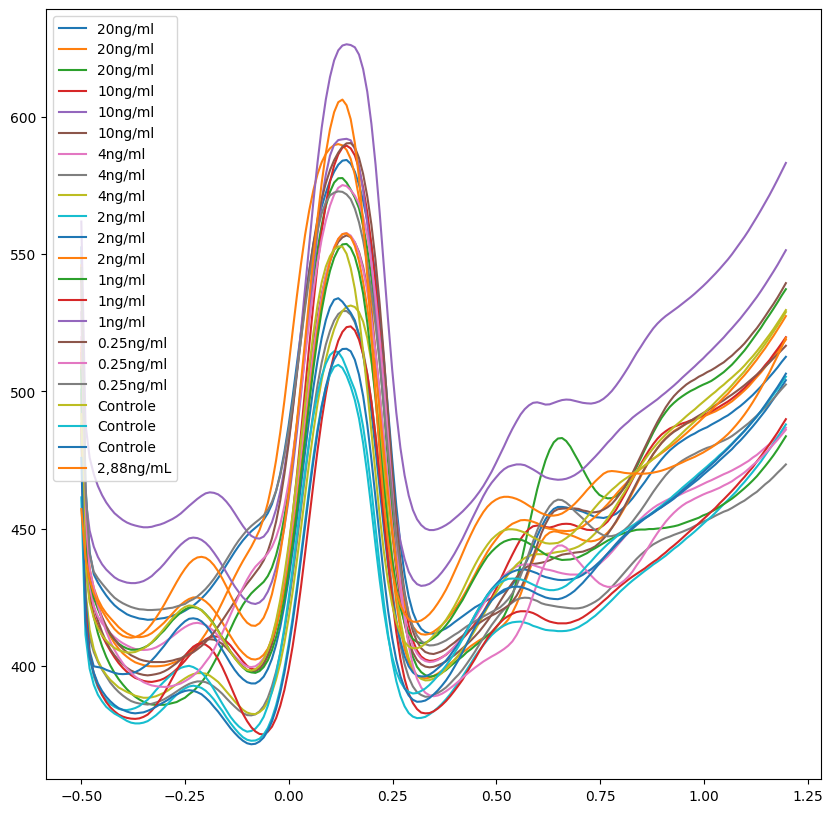

In [66]:
#Plotando todos os valores em função do potencial
potential = df.iloc[:,0].values
plt.figure(figsize=(10,10))

for i, col in enumerate(df_final_vpd.columns):
    if i != 0 and isinstance(col, str):
        values = df_final_vpd.iloc[:,i].values
        plt.plot(potential, values, label = concentrations[col])
plt.legend()
plt.show()


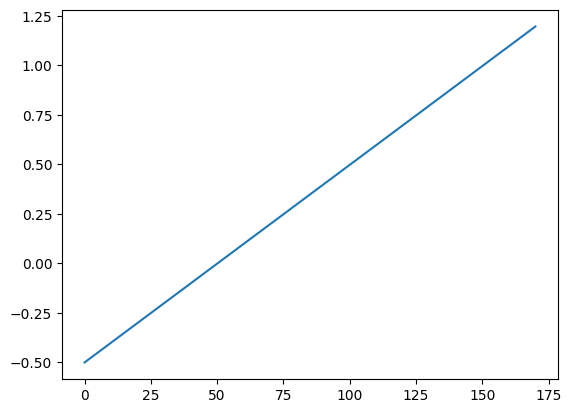

In [35]:
# Montagem do dataset observando a corrente de pico
plt.plot(potential)

## Pegando um exemplo para calcular a corrente de pico

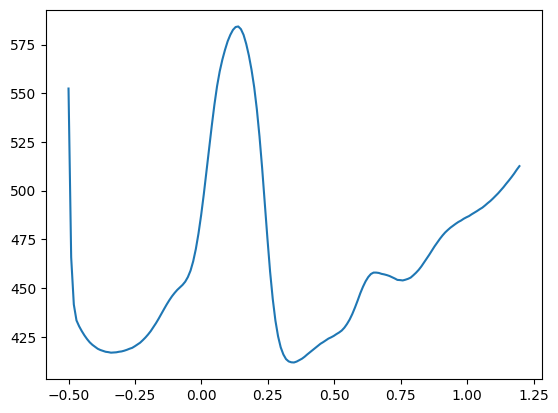

In [36]:
vpd = df_final_vpd.iloc[:,1].values
plt.plot(potential, vpd)

In [37]:
fp = findpeaks(lookahead=10)
all_peaks_valleys = fp.fit(vpd)['df']
valleys_coordinates= all_peaks_valleys[all_peaks_valleys['valley'] == True]
peaks_coordinates= all_peaks_valleys[all_peaks_valleys['peak'] == True]

# Pegando todos os valores y e x para criar a equação da reta y = y0 (reta )
values_sorted_y = valleys_coordinates.sort_values(by = 'y')
coordinates = values_sorted_y.iloc[0:1, 0:2].values
x0, y0 = coordinates[0]

print(f"Pair = ({potential[int(x0)]},{y0})")

[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Pair = (0.348534,411.765)


In [38]:
# Pegando o maior pico
values_sorted_y = peaks_coordinates.sort_values(by = 'y', ascending=False)
coordinates = values_sorted_y.iloc[0:1, 0:2].values
x1, y1 = coordinates[0]

print(f"Pair = ({potential[int(x1)]},{y1})")

Pair = (0.138907,584.253)


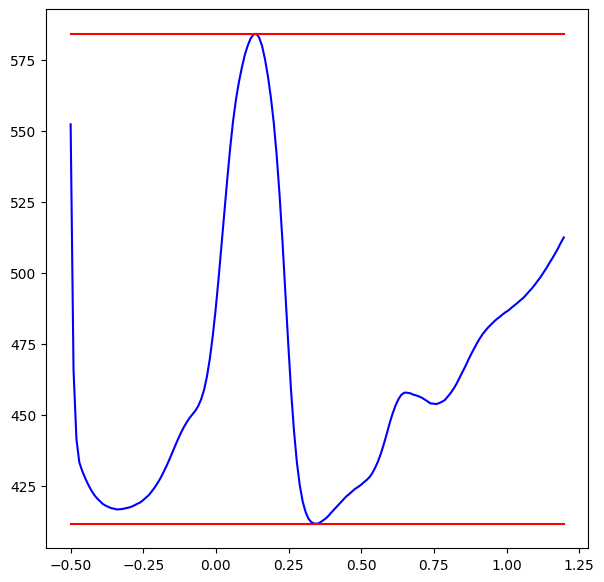

In [39]:
# Plotando a reta em conjunto com a curva

plt.figure(figsize=(7,7))
plt.plot(potential, vpd, color = 'b')
line = np.zeros(shape=(len(potential),))
line[:] = y0
plt.plot(potential, line, color = 'red')
line[:] = y1
plt.plot(potential, line, color = 'red')


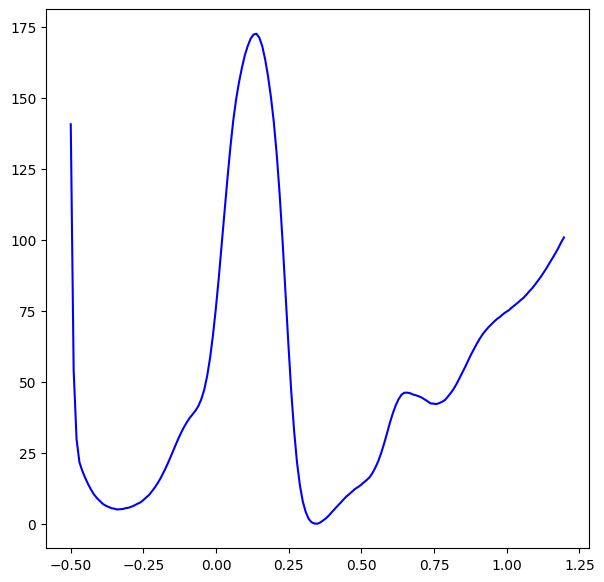

In [40]:
# Trazendo toda a curva para baixo para calcular a área
vpd = vpd - y0
plt.figure(figsize=(7,7))
plt.plot(potential, vpd, color = 'b')

In [41]:
# Corrente de pico
id = vpd[int(x1)]
area = np.trapz(potential, vpd)
print(f"Id = {id}")
print(f"Area = {area}")

Id = 172.48800000000006
Area = 102.33271628408104


# Montando o dataset

In [42]:

data = np.zeros(shape=(df_final_vpd.shape[1] - 1, 3))

for i in range(1, df_final_vpd.shape[1]):
    col = df_final_vpd.columns[i]
    if isinstance(col, str):
        vpd = df_final_vpd.iloc[:,i].values
        all_peaks_valleys = fp.fit(vpd)['df']
        valleys_coordinates= all_peaks_valleys[all_peaks_valleys['valley'] == True]
        peaks_coordinates= all_peaks_valleys[all_peaks_valleys['peak'] == True]

        # Pegando todos os valores y e x para criar a equação da reta y = y0 (reta )
        values_sorted_y = valleys_coordinates.sort_values(by = 'y')
        coordinates1 = values_sorted_y.iloc[0:1, 0:2].values
        
        if (len(coordinates1) > 0):
            x0, y0 = coordinates1[0]

            print(f"Pair of valley = ({potential[int(x0)]},{y0})")
        
        # Pegando o maior pico
        values_sorted_y = peaks_coordinates.sort_values(by = 'y', ascending=False)
        coordinates2 = values_sorted_y.iloc[0:1, 0:2].values
        
        if (len(coordinates2 > 0)):
            x1, y1 = coordinates2[0]

            print(f"Pair of peaks = ({potential[int(x1)]},{y1})")
        
        if (len(coordinates2 > 0) and len(coordinates1 > 0)):
        
            # Trazendo toda a curva para baixo para calcular a área
            vpd = vpd - y0
            
            id = vpd[int(x1)]
            area = np.trapz(potential, vpd)
            print(f"Id = {id}")
            print(f"Area = {area}")
            data[i - 1,0] = id
            data[i-1, 1] = area
            data[i-1, 2] = concentrations_1[col]
            
        else:
            print(f"Case: {i} - > Peaks not found")
    

[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Pair of valley = (0.348534,411.765)
Pair of peaks = (0.138907,584.253)
Id = 172.48800000000006
Area = 102.33271628408104
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Pair of valley = (0.32857,395.468)
Pair of peaks = (0.118943,590.021)
Id = 194.55299999999994
Area = 116.1921684200961
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Pair of valley = (-0.320277,385.855)
Pair of peaks = (0.128925,577.661)
Id = 191.80599999999993
Area = 120.40358334945745
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Pair of valley = (-0.330259,394.186)
Pair of peaks = (0.138907,589.471)
Id = 195.28500000000003
Area = 100.13234702637801
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
Pair of valley = (-0.0707205,446.372)
Pair of peaks = (0.138907,626.368)
Id = 179.99600000000004
Area = 126.73800637180051
[findpeaks] >Finding peaks in 1d-vector using [peakde

In [43]:
dataset_vpd = pd.DataFrame(data, columns=['Id', 'A', 'concentration'])

In [44]:
dataset_vpd.head(10)

,Id,A,concentration
0,172.488,102.332716,2.000000e-08
1,194.553,116.192168,2.000000e-08
2,191.806,120.403583,2.000000e-08
3,195.285,100.132347,1.000000e-08
4,179.996,126.738006,1.000000e-08
5,160.220,113.129814,1.000000e-08
6,158.023,87.450794,4.000000e-09
7,147.219,84.345973,4.000000e-09
8,148.776,130.927882,4.000000e-09
9,138.521,107.946744,2.000000e-09


In [45]:
concentration = float(0)
mean_list = []
min_list = []

for k in concentrations_1.keys():
    value = concentrations_1[k]
    if (concentration != value):
        mean_id = dataset_vpd[dataset_vpd['concentration'] == value].loc[:,'Id'].mean()
        mean_A = dataset_vpd[dataset_vpd['concentration'] == value].loc[:,'A'].mean()
        min_id = dataset_vpd[dataset_vpd['concentration'] == value].loc[:,'Id'].min()
        min_A = dataset_vpd[dataset_vpd['concentration'] == value].loc[:,'A'].min()
        concentration = value
        mean_list.append([mean_id, mean_A, concentration])
        min_list.append([min_id, min_A, concentration])
        print(f"ID: {mean_id}, A: {mean_A}, []: {concentration}")

ID: 186.28233333333333, A: 112.97615601787818, []: 2e-08
ID: 178.50033333333337, A: 113.33338924058603, []: 1e-08
ID: 151.33933333333337, A: 100.90821605642084, []: 4e-09
ID: 144.65533333333335, A: 109.87522791560083, []: 2e-09
ID: 158.0533333333333, A: 99.82841839174215, []: 1e-09
ID: 180.148, A: 106.83633902657948, []: 2.5e-10
ID: 145.11333333333337, A: 110.38117438696116, []: 1e-14
ID: 195.94880000000006, A: 63.97500099478686, []: 2.88e-09


In [46]:
vpd_dataset_mean = pd.DataFrame(mean_list, columns=['Id', 'A', 'concentration'])
vpd_dataset_min = pd.DataFrame(min_list, columns=['Id', 'A', 'concentration'])

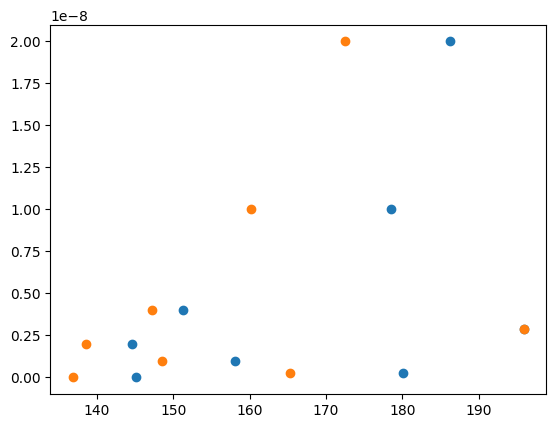

In [47]:
# Plotando os valores de Id em função da concentração
plt.scatter(vpd_dataset_mean['Id'].values, vpd_dataset_mean['concentration'])
plt.scatter(vpd_dataset_min['Id'].values, vpd_dataset_mean['concentration'])

<Axes: >

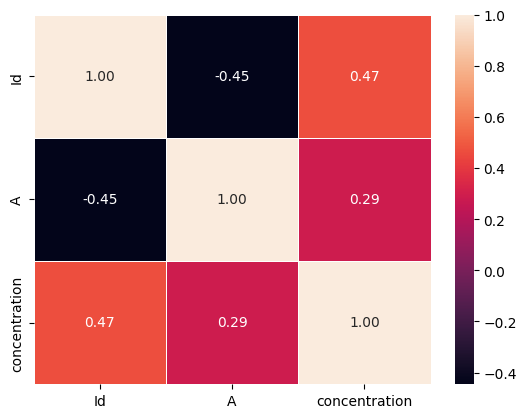

In [48]:
# Importando a Matriz de correlação
import seaborn as sn
correlations = vpd_dataset_mean.corr()
sn.heatmap(correlations, annot=True, fmt='.2f', linewidths=.6)

<Axes: >

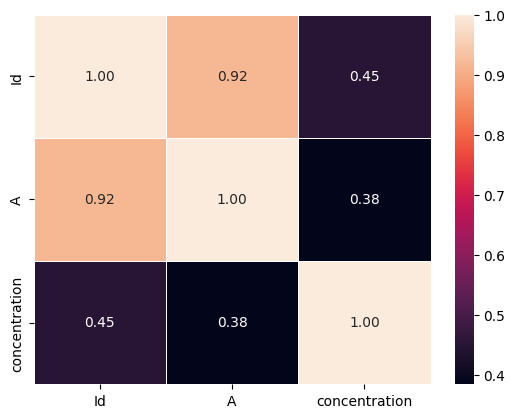

In [49]:
# Importando a Matriz de correlação
import seaborn as sn
correlations = dataset_vpd.corr()
sn.heatmap(correlations, annot=True, fmt='.2f', linewidths=.6)

<Axes: >

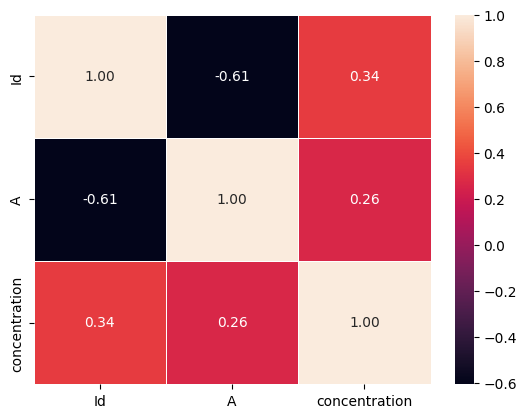

In [50]:
correlations = vpd_dataset_min.corr()
sn.heatmap(correlations, annot=True, fmt='.2f', linewidths=.6)

Não existe uma correlação muito boa entre a corrente de pico e a concentração de troponina

# Avaliação da derivada da curva de troponina

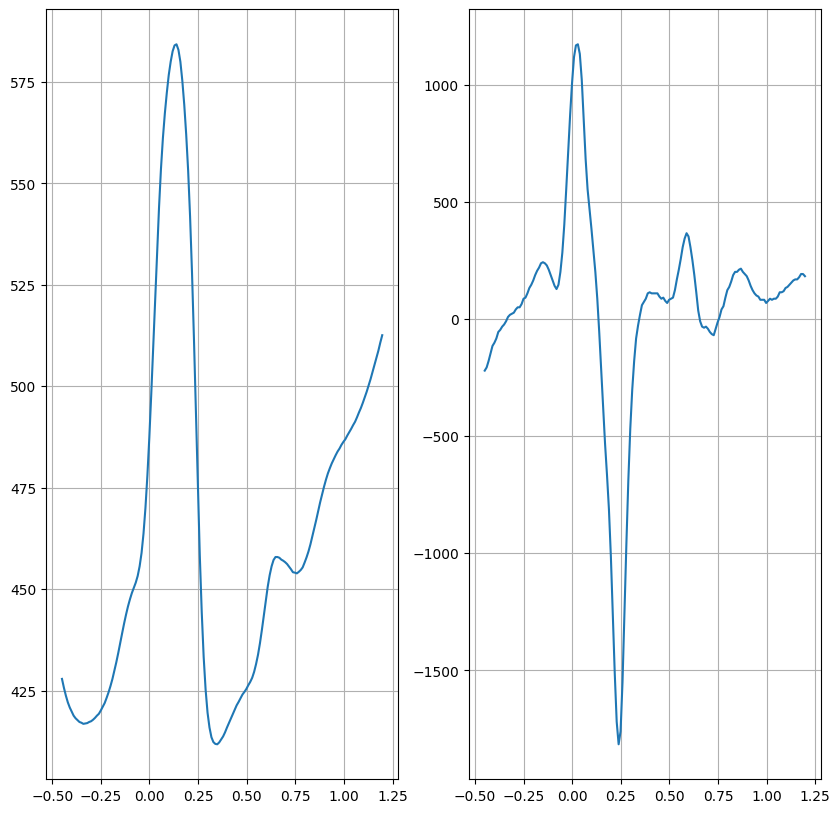

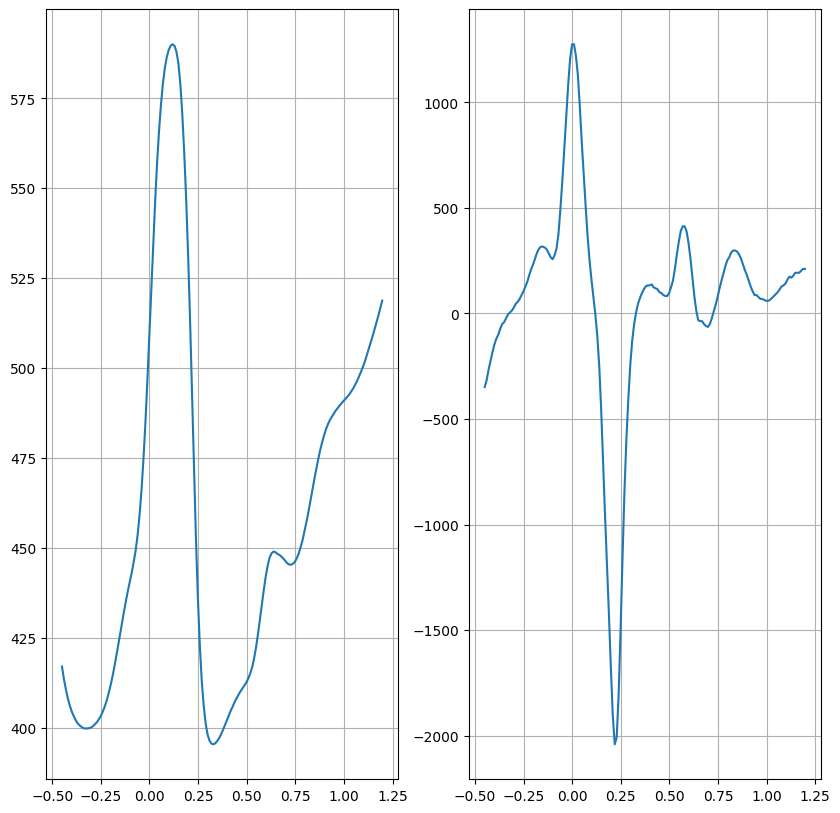

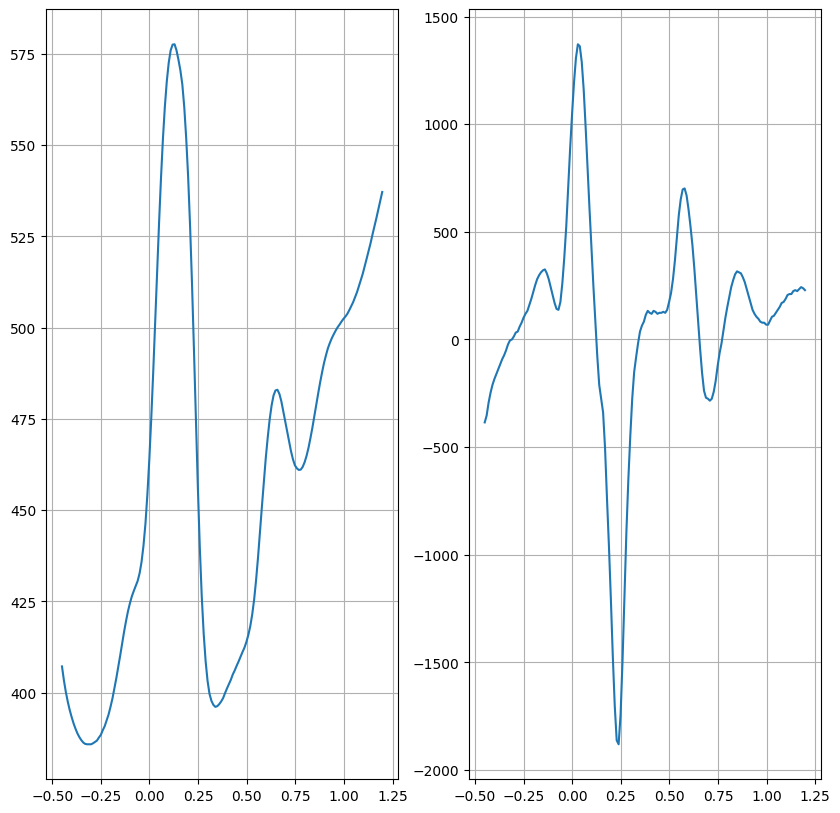

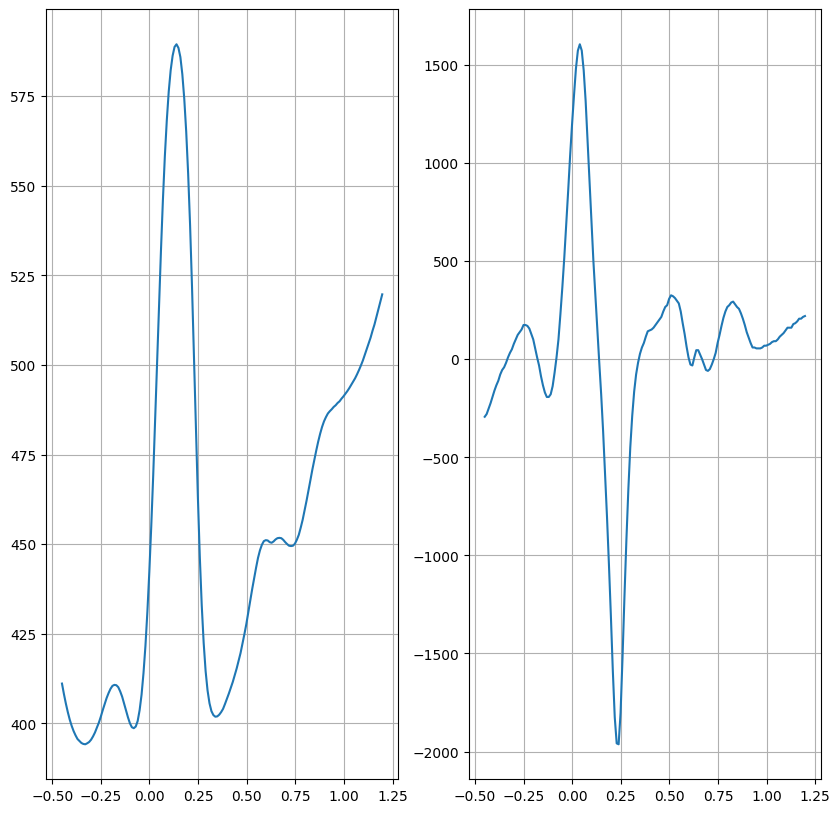

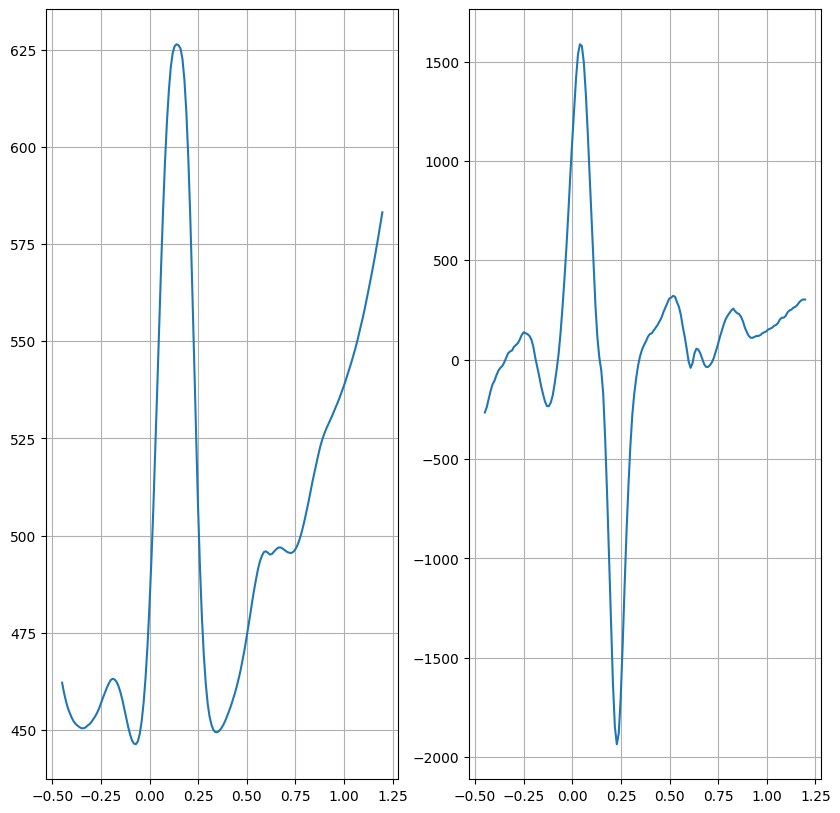

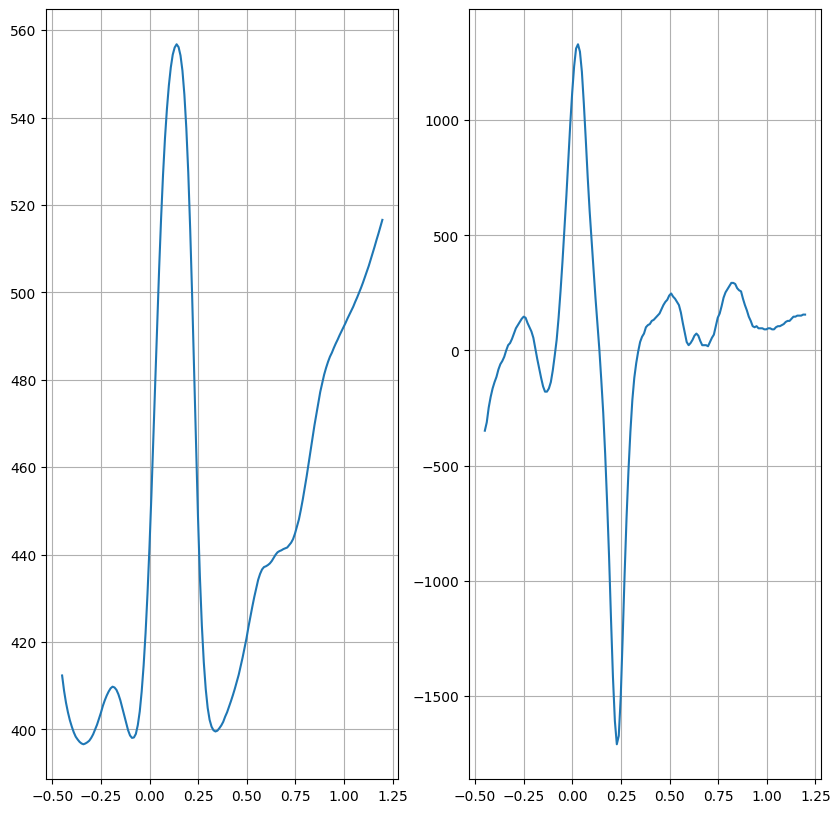

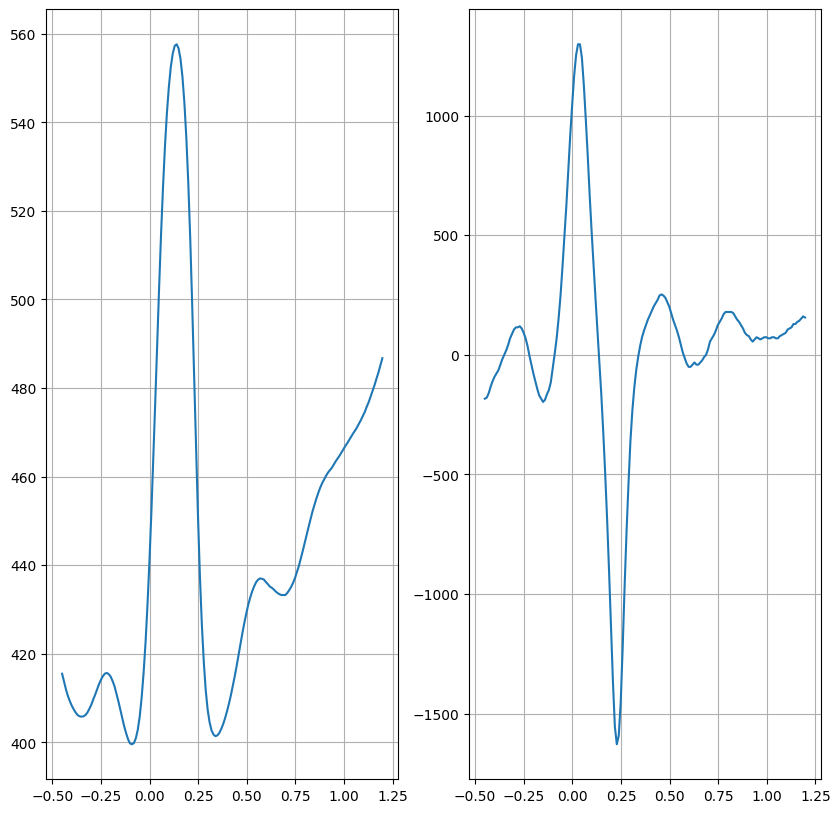

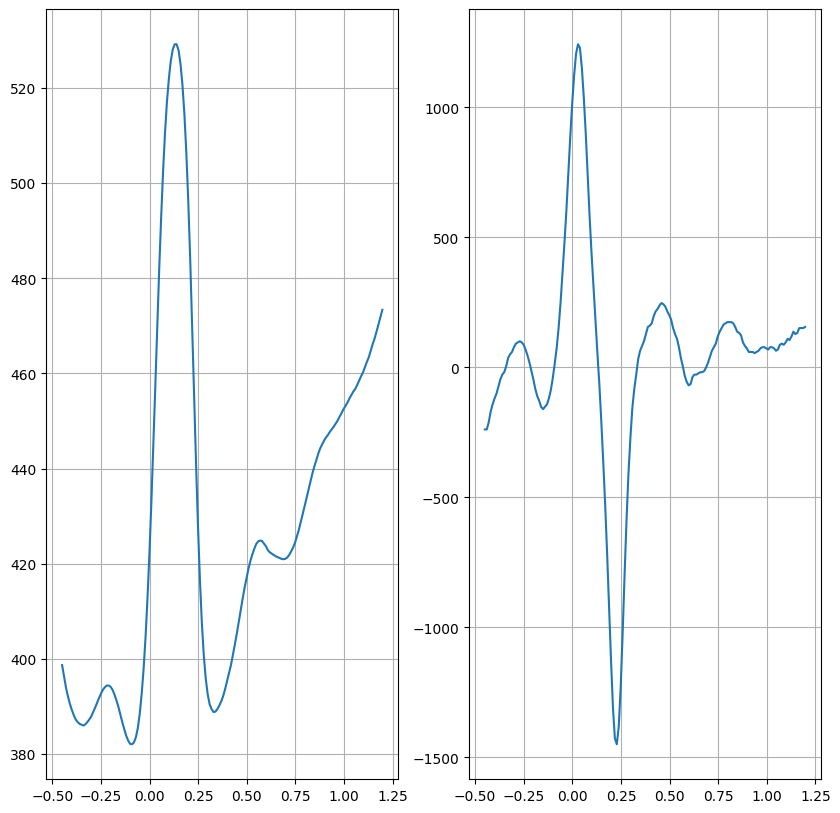

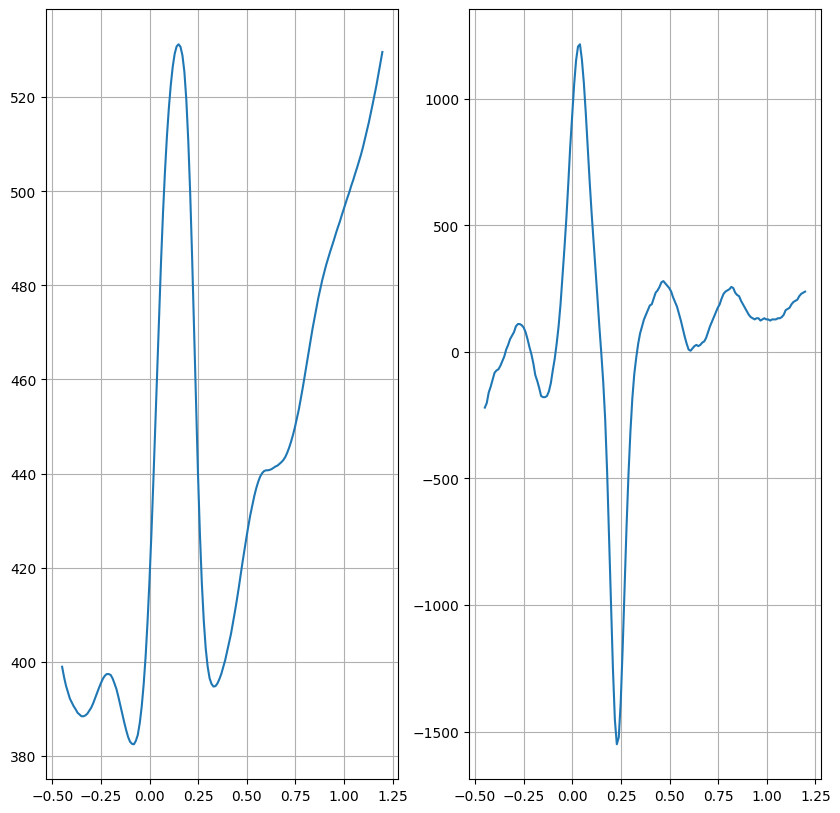

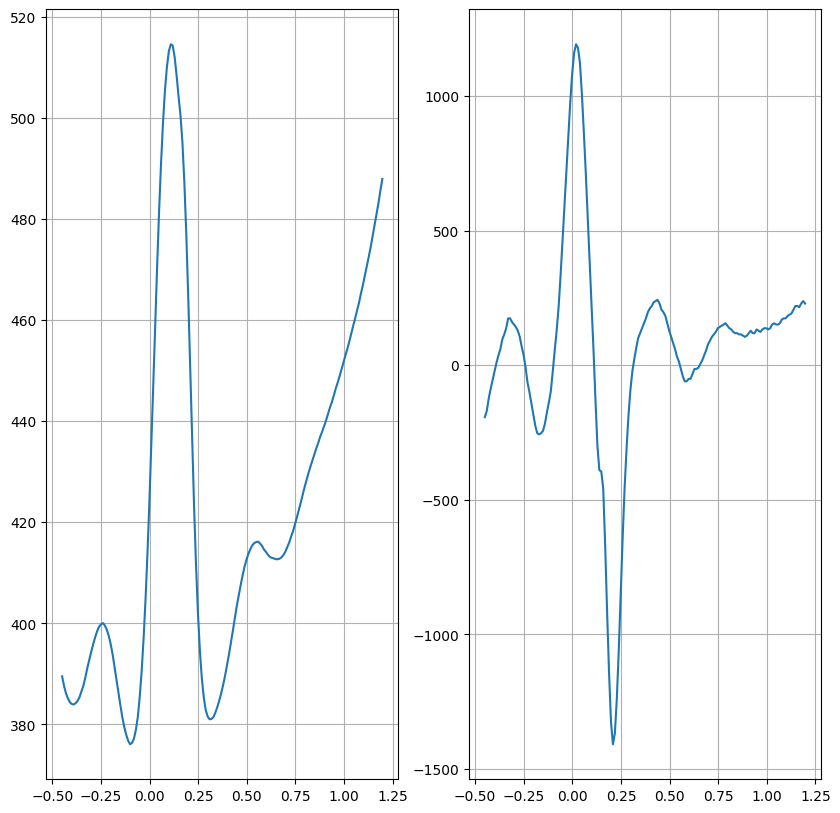

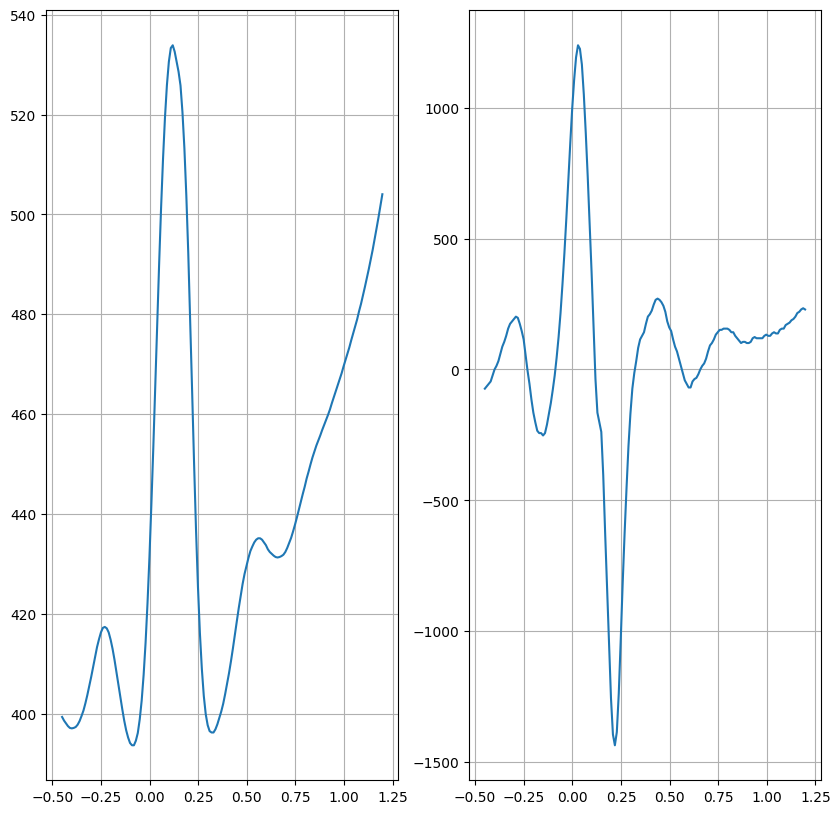

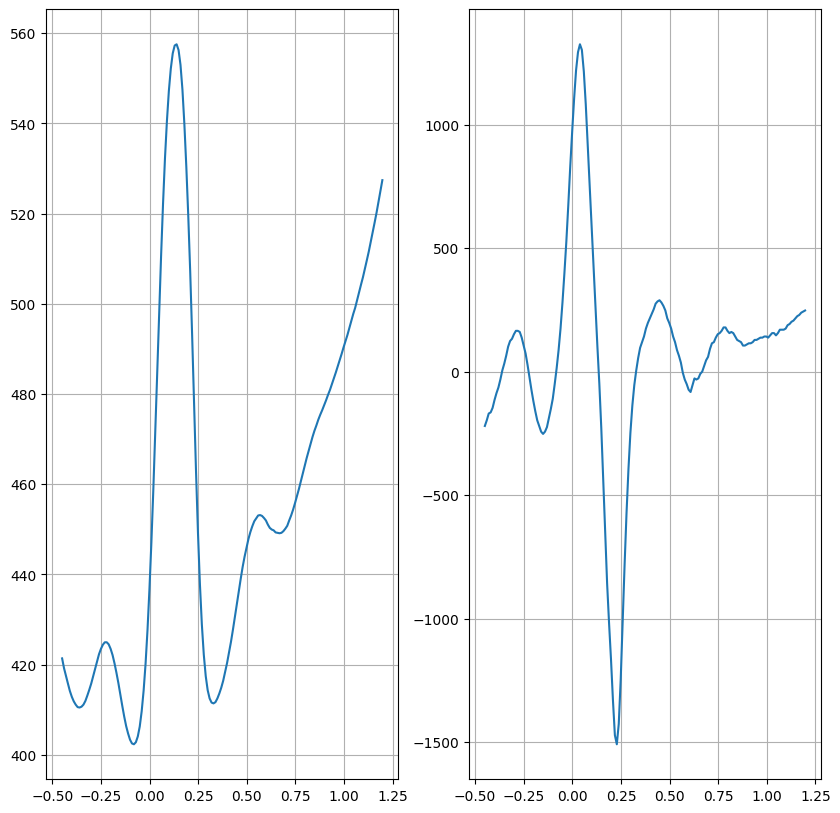

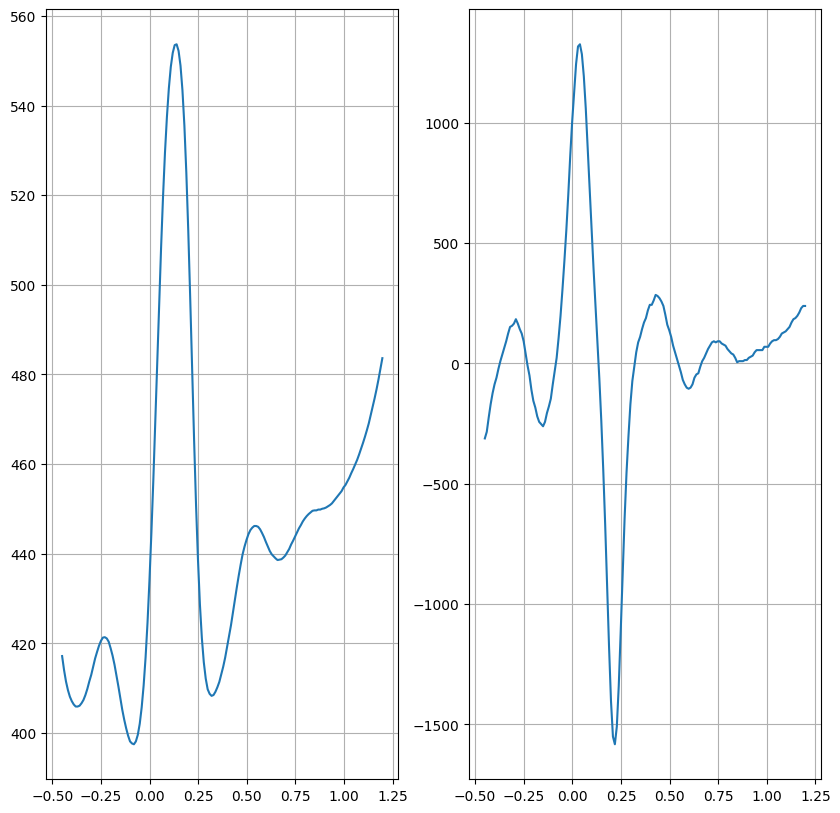

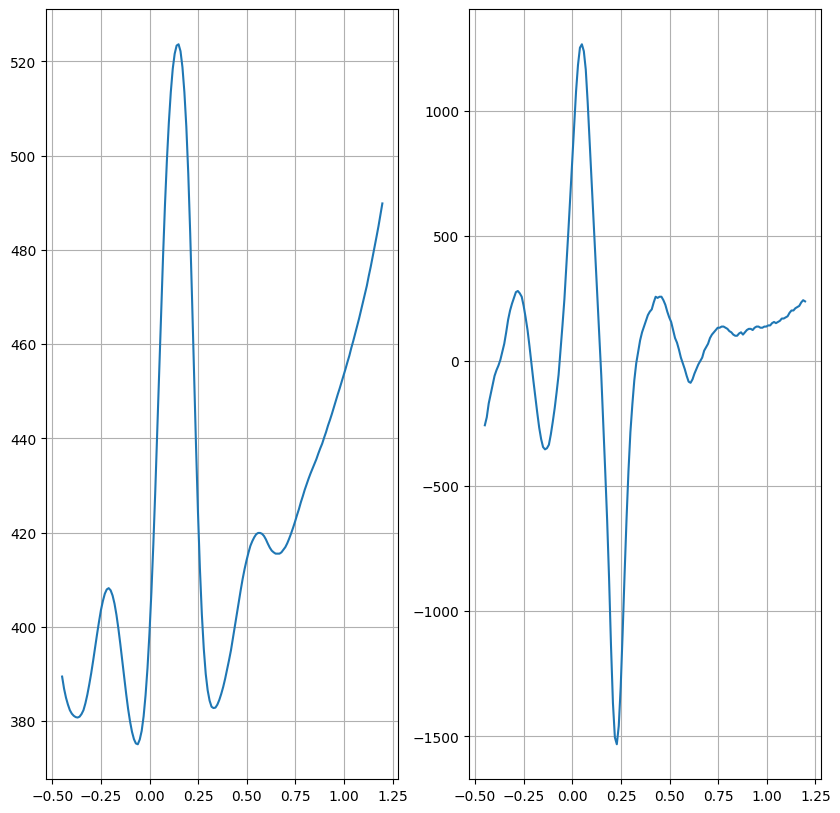

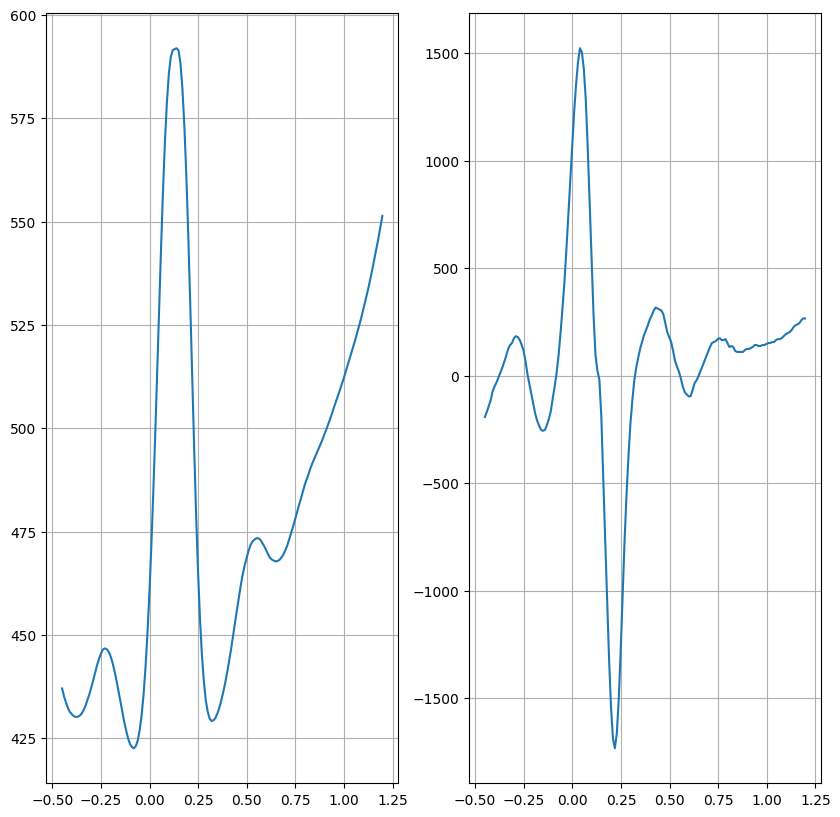

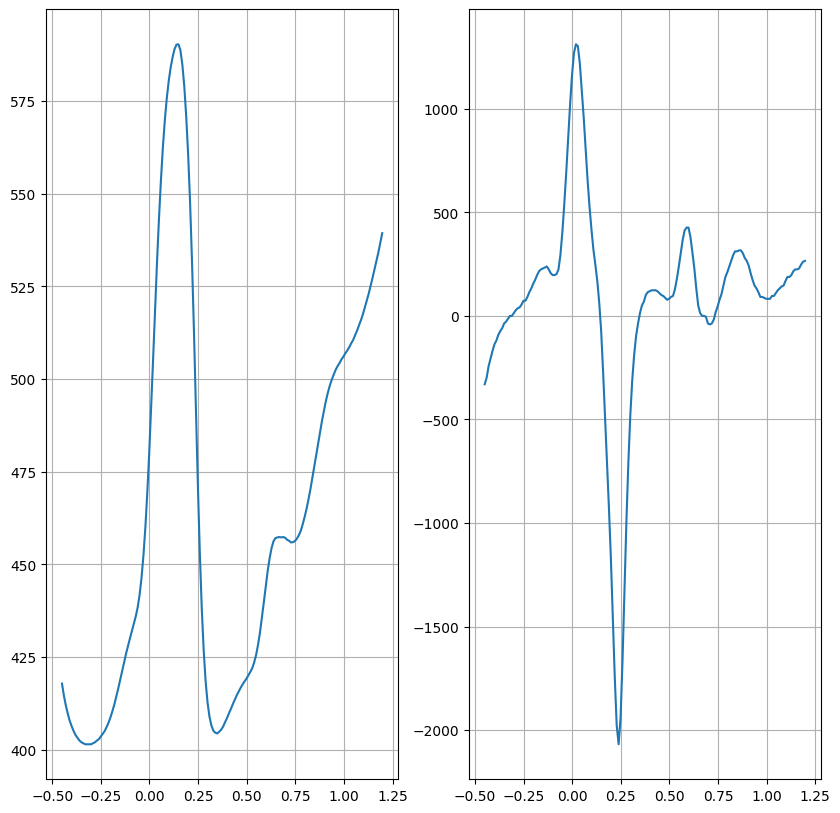

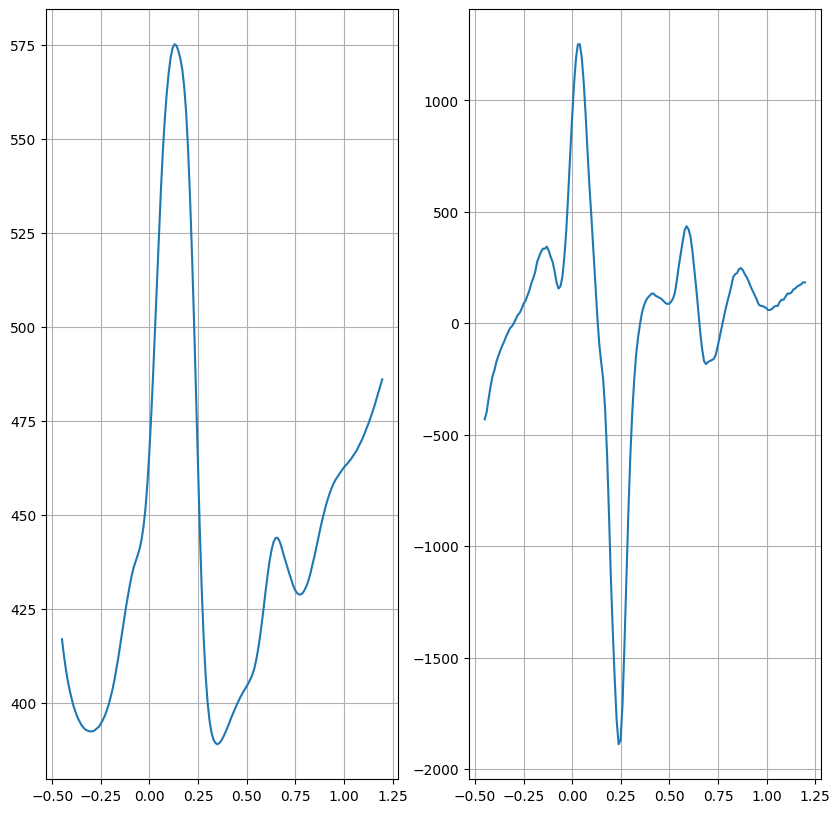

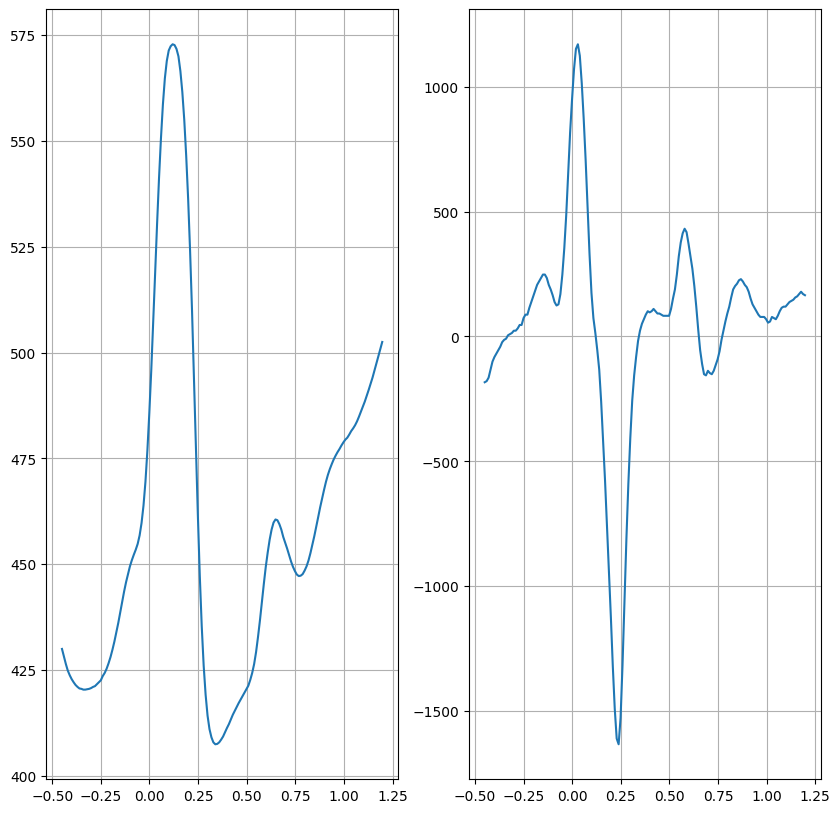

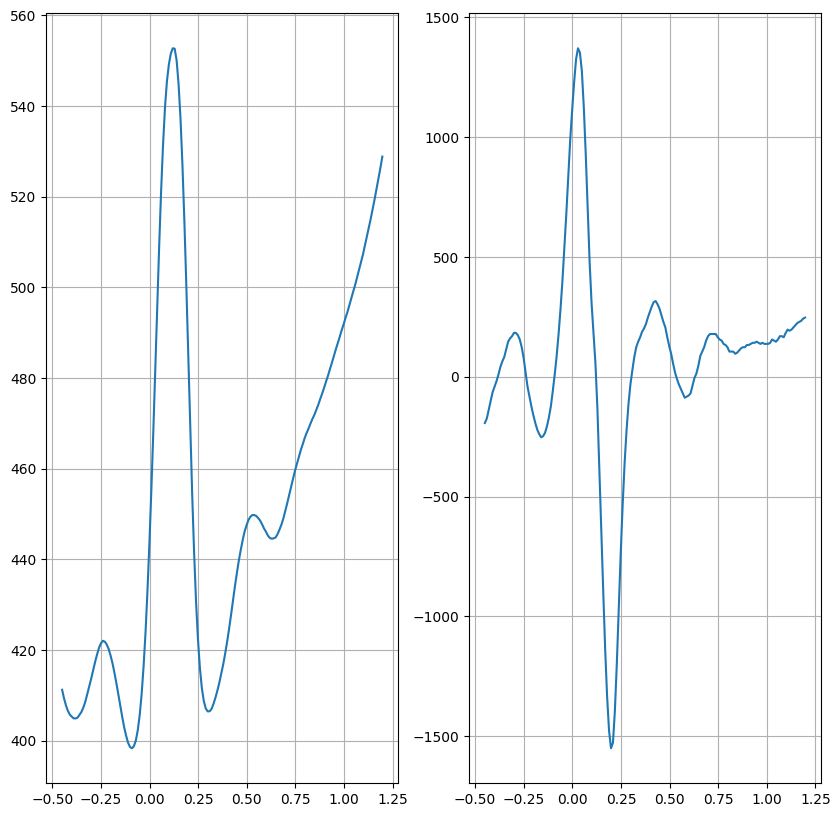

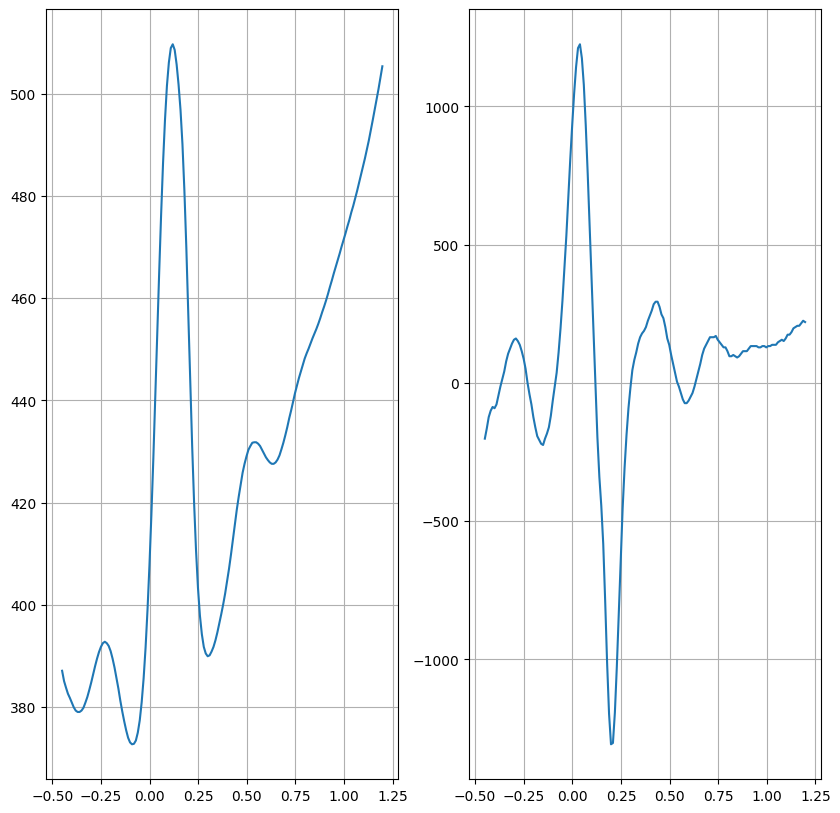

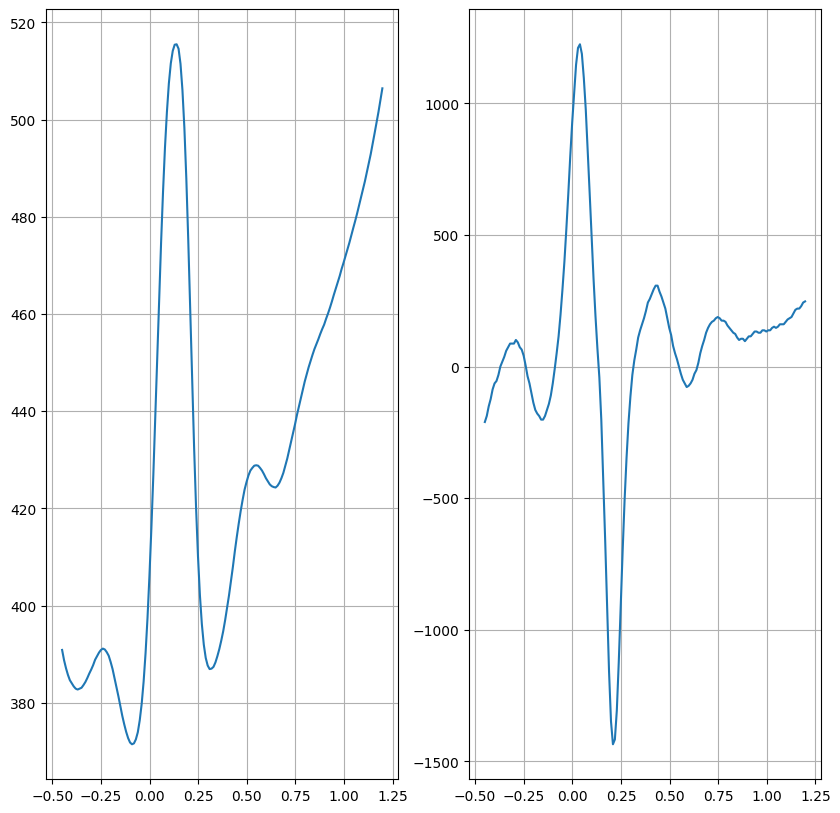

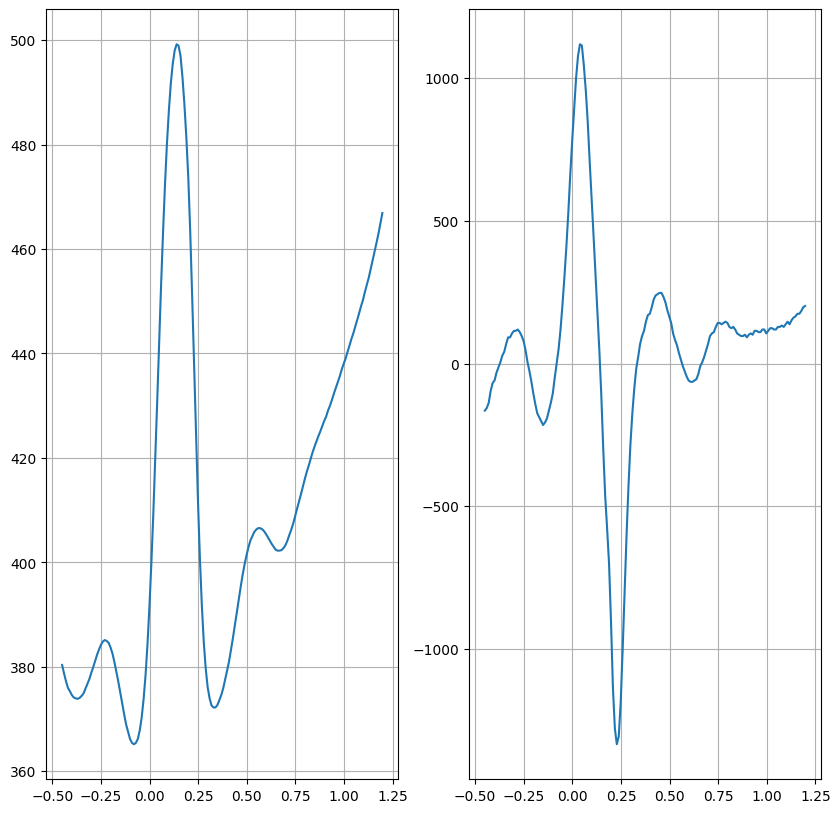

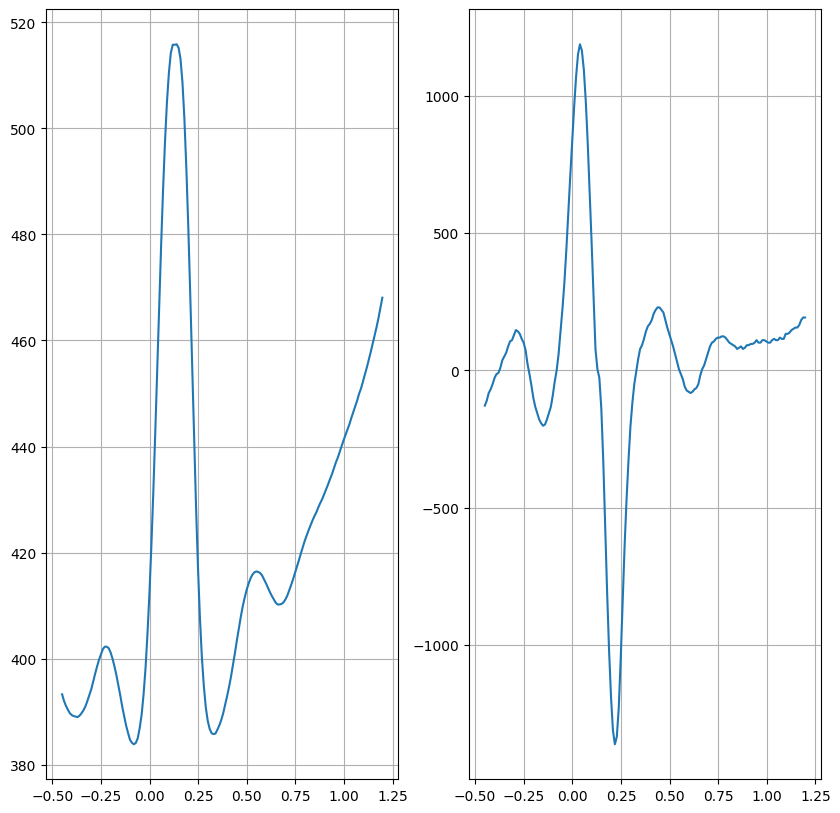

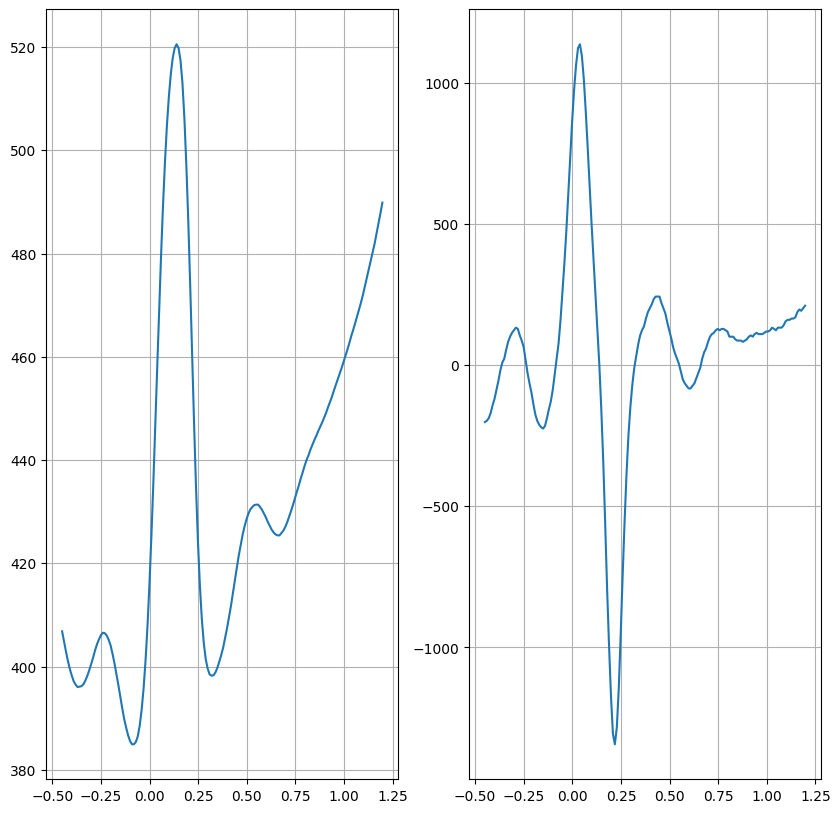

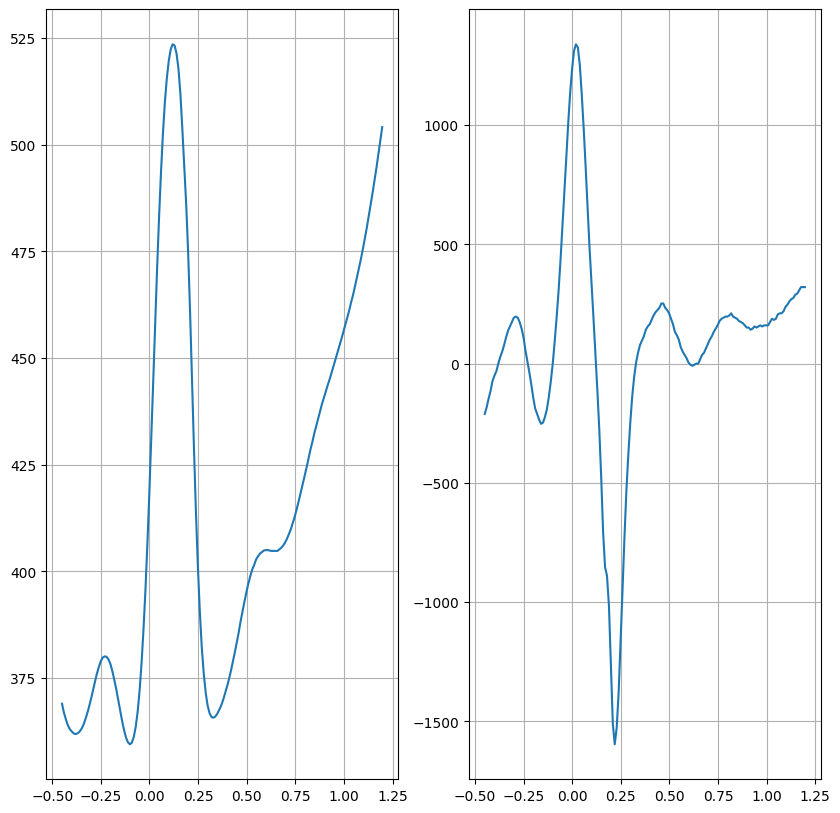

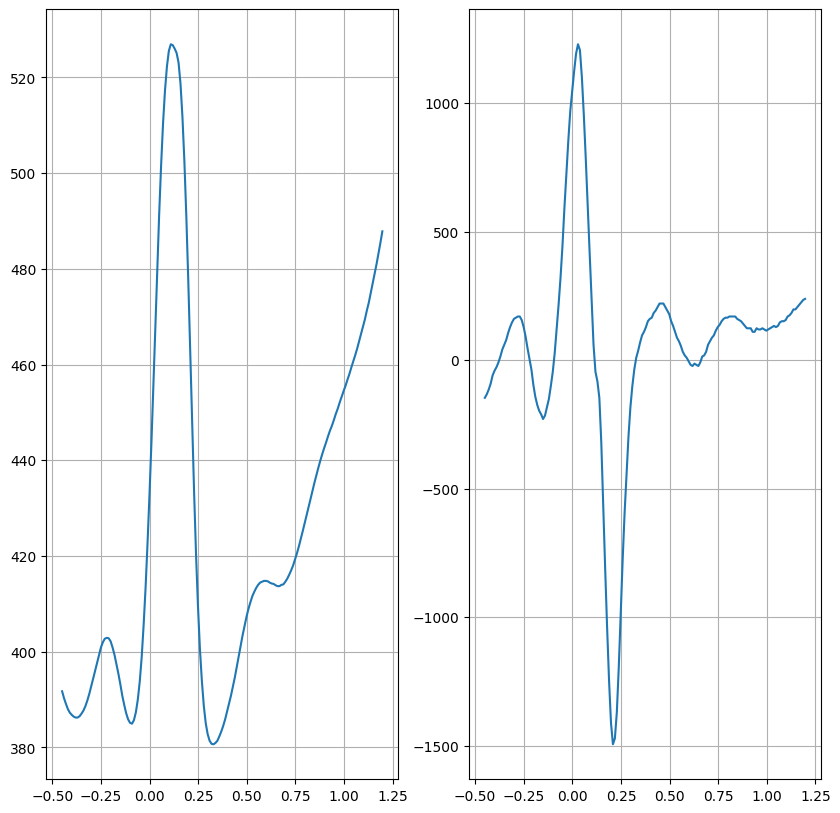

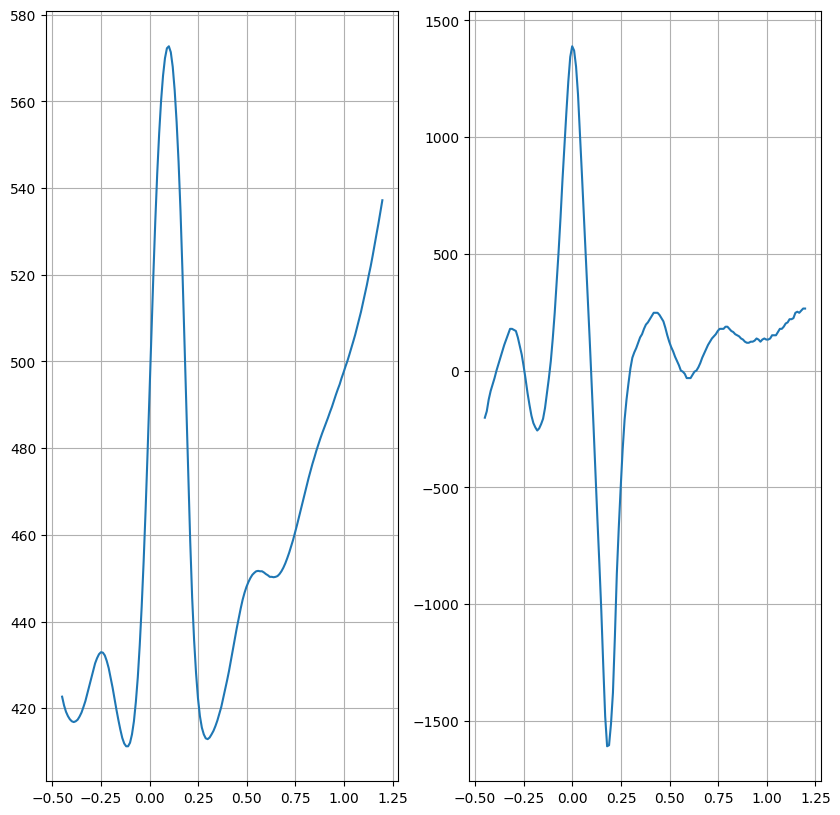

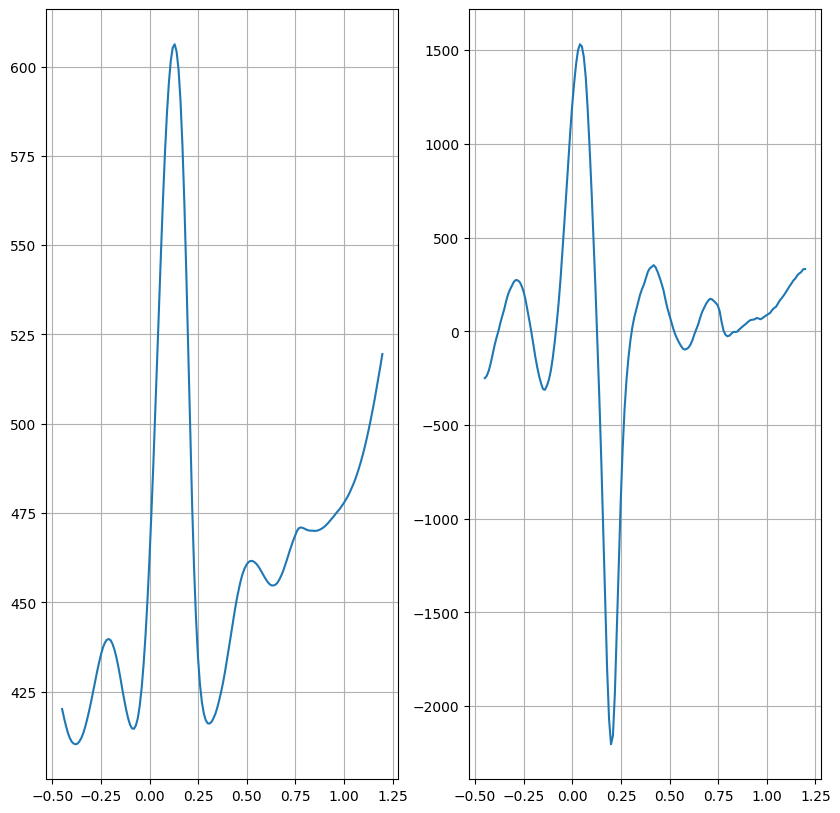

In [65]:
elec = Electrode()
for col in range(1, len(df_final_vpd.columns)):
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows= 1, figsize = (10,10))
    vpd_current = df_final_vpd.iloc[5:, col].values
    #derivate, filtered_derivate = elec.derivate(potential, vpd_current)
    derivate = np.gradient(vpd_current, potential[5:])
    #plt.plot(potential, filtered_derivate)
    ax1.plot(potential[5:], vpd_current)
    ax1.grid()
    ax2.plot(potential[5:], derivate)
    ax2.grid()
    plt.show()